<a href="https://colab.research.google.com/github/ClaudiaCande/CreditCardDatasetClustering/blob/main/creditcardclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Problem Definition
## ---------------------------------------------------------------------------

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
The source for the dataset is https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data

Following is the Data Dictionary for Credit Card dataset :-

* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

# II. Data Exploration and Preprocessing
##-----------------------------------------------------------------------------

In [44]:
import pandas as pd
%run library/descriptivestatistics.ipynb

In [45]:
#Load dataset and basic info
data= pd.read_csv('CCGENERAL.csv')
df=pd.DataFrame(data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [46]:
df.drop('CUST_ID', axis=1, inplace = True)

##OVERVIEW OF THE DATASET

In [47]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [4]:
#DUPLICATE DATA
df.duplicated ().sum ()

0

In [4]:
missing_data(df).style.highlight_max(color = 'green', axis = 0)


,name of column,types,unique_data,missing value,missing percentage
0,BALANCE,float64,8871,0,0.000000
1,BALANCE_FREQUENCY,float64,43,0,0.000000
2,PURCHASES,float64,6203,0,0.000000
3,ONEOFF_PURCHASES,float64,4014,0,0.000000
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000
5,CASH_ADVANCE,float64,4323,0,0.000000
6,PURCHASES_FREQUENCY,float64,47,0,0.000000
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000


In [8]:
analyze_dataset_numerical(df).style.highlight_max(color = 'green', axis = 0)

,column,n,min,max,mean,std,median,q1,q3,iqr,skewness,kurtosis,lower_fence,upper_fence,n_outliers
0,BALANCE,8950,0.000000,19043.138560,1564.474828,2081.531879,873.385231,128.281915,2054.140036,1925.858120,2.392985,7.669794,-2760.505265,4942.927215,695
1,BALANCE_FREQUENCY,8950,0.000000,1.000000,0.877271,0.236904,1.000000,0.888889,1.000000,0.111111,-2.022926,3.089972,0.722223,1.166666,1493
2,PURCHASES,8950,0.000000,49039.570000,1003.204834,2136.634782,361.280000,39.635000,1110.130000,1070.495000,8.142904,111.325882,-1566.107500,2715.872500,808
3,ONEOFF_PURCHASES,8950,0.000000,40761.250000,592.437371,1659.887917,38.000000,0.000000,577.405000,577.405000,10.043399,164.095191,-866.107500,1443.512500,1013
4,INSTALLMENTS_PURCHASES,8950,0.000000,22500.000000,411.067645,904.338115,89.000000,0.000000,468.637500,468.637500,7.297897,96.520563,-702.956250,1171.593750,867
5,CASH_ADVANCE,8950,0.000000,47137.211760,978.871112,2097.163877,0.000000,0.000000,1113.821139,1113.821139,5.165743,52.869216,-1670.731709,2784.552848,1030
6,PURCHASES_FREQUENCY,8950,0.000000,1.000000,0.490351,0.401371,0.500000,0.083333,0.916667,0.833334,0.060154,-1.638386,-1.166668,2.166668,0
7,ONEOFF_PURCHASES_FREQUENCY,8950,0.000000,1.000000,0.202458,0.298336,0.083333,0.000000,0.300000,0.300000,1.535355,1.160526,-0.450000,0.750000,782
8,PURCHASES_INSTALLMENTS_FREQUENCY,8950,0.000000,1.000000,0.364437,0.397448,0.166667,0.000000,0.750000,0.750000,0.509116,-1.398521,-1.125000,1.875000,0
9,CASH_ADVANCE_FREQUENCY,8950,0.000000,1.500000,0.135144,0.200121,0.000000,0.000000,0.222222,0.222222,1.828380,3.332201,-0.333333,0.555555,525


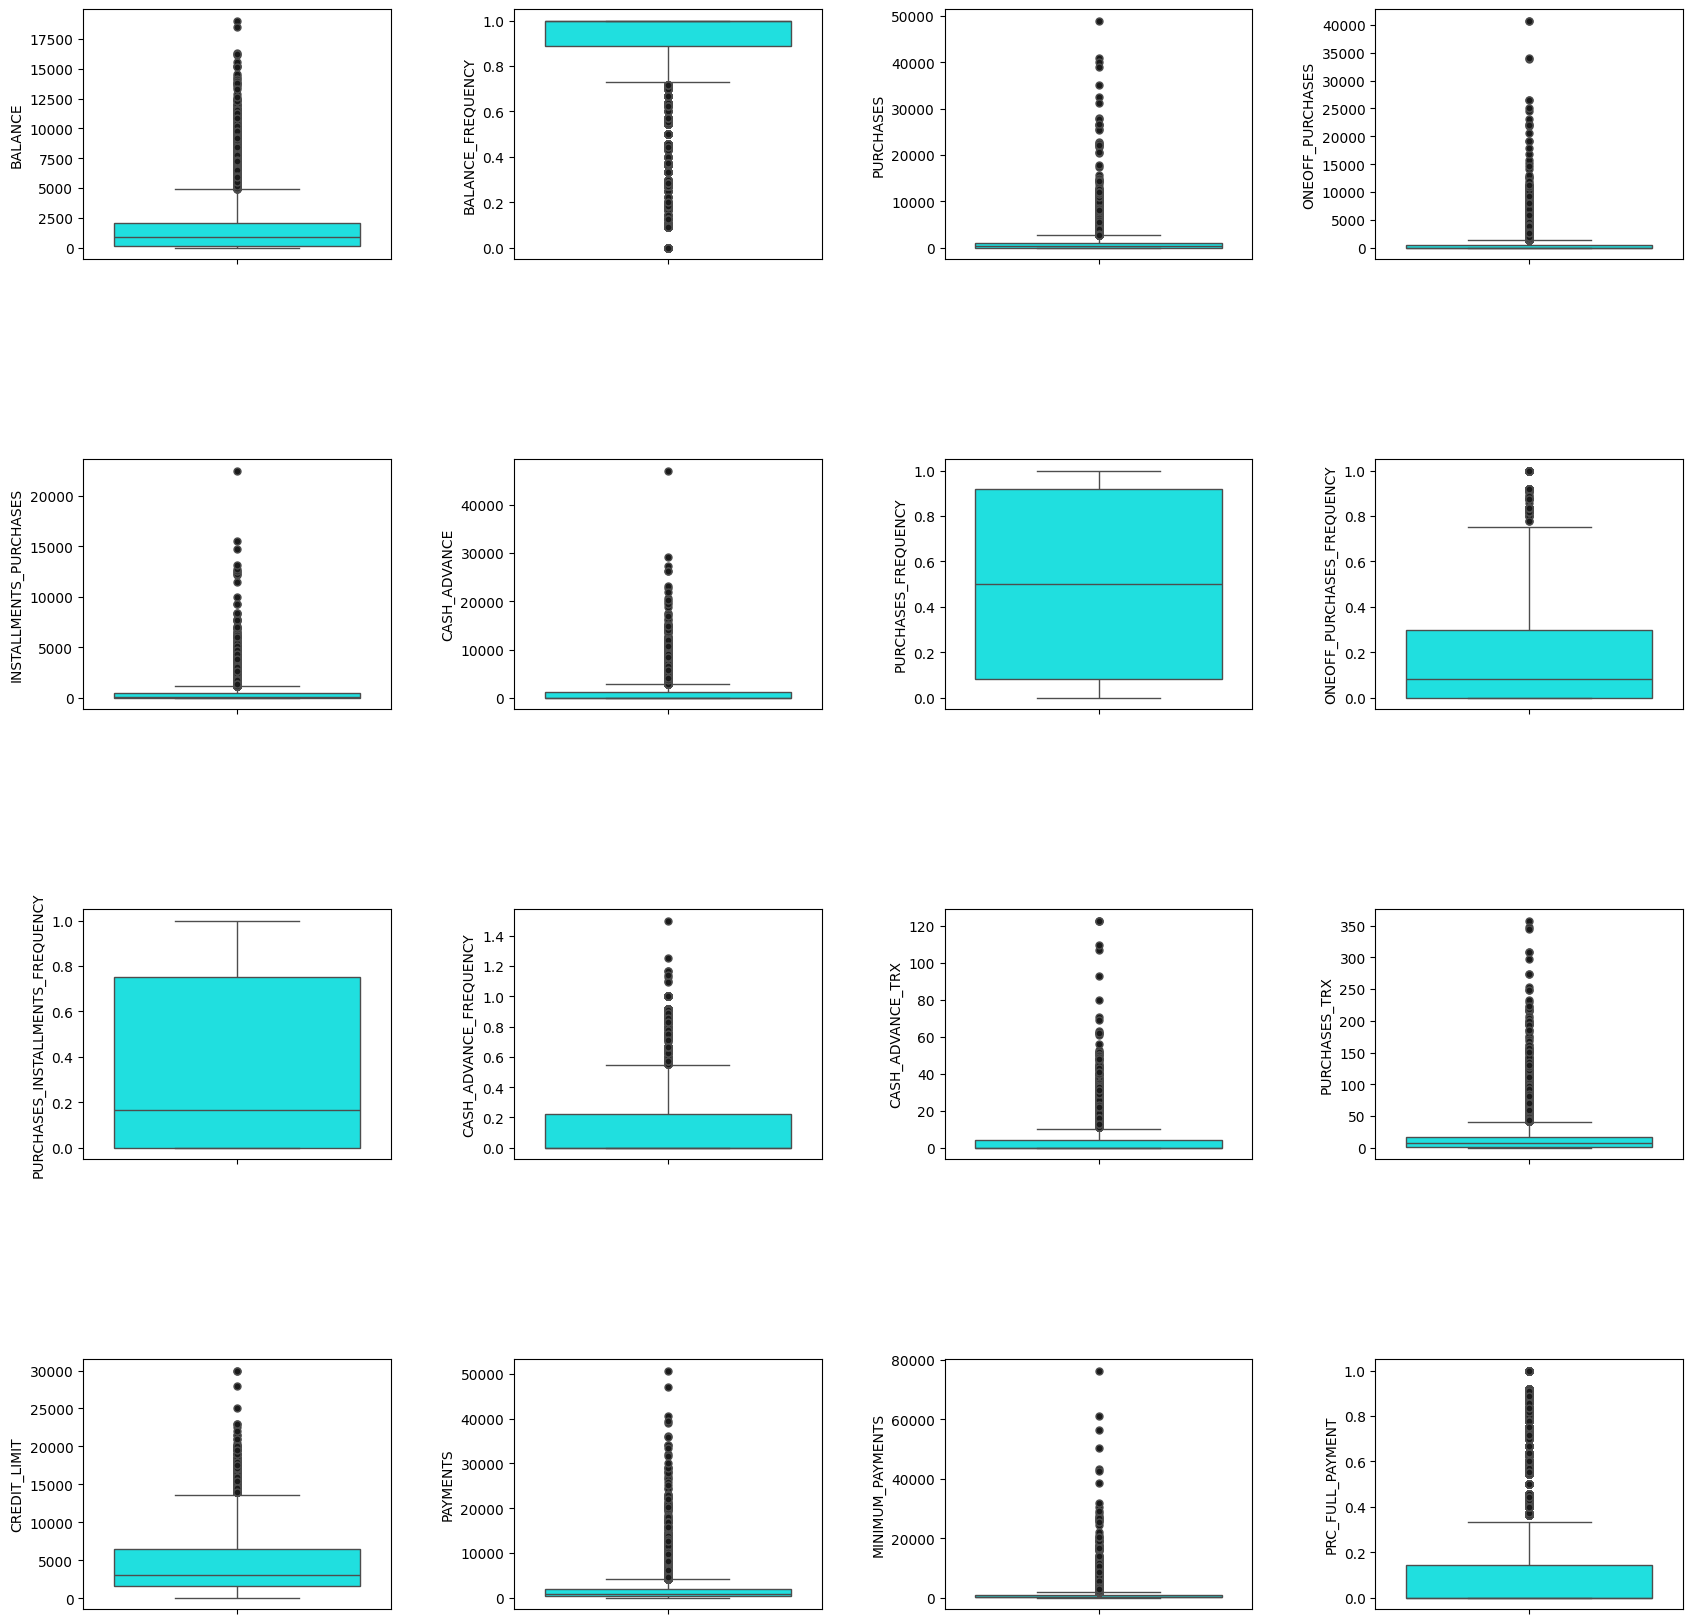

In [9]:
boxplot_df(df)

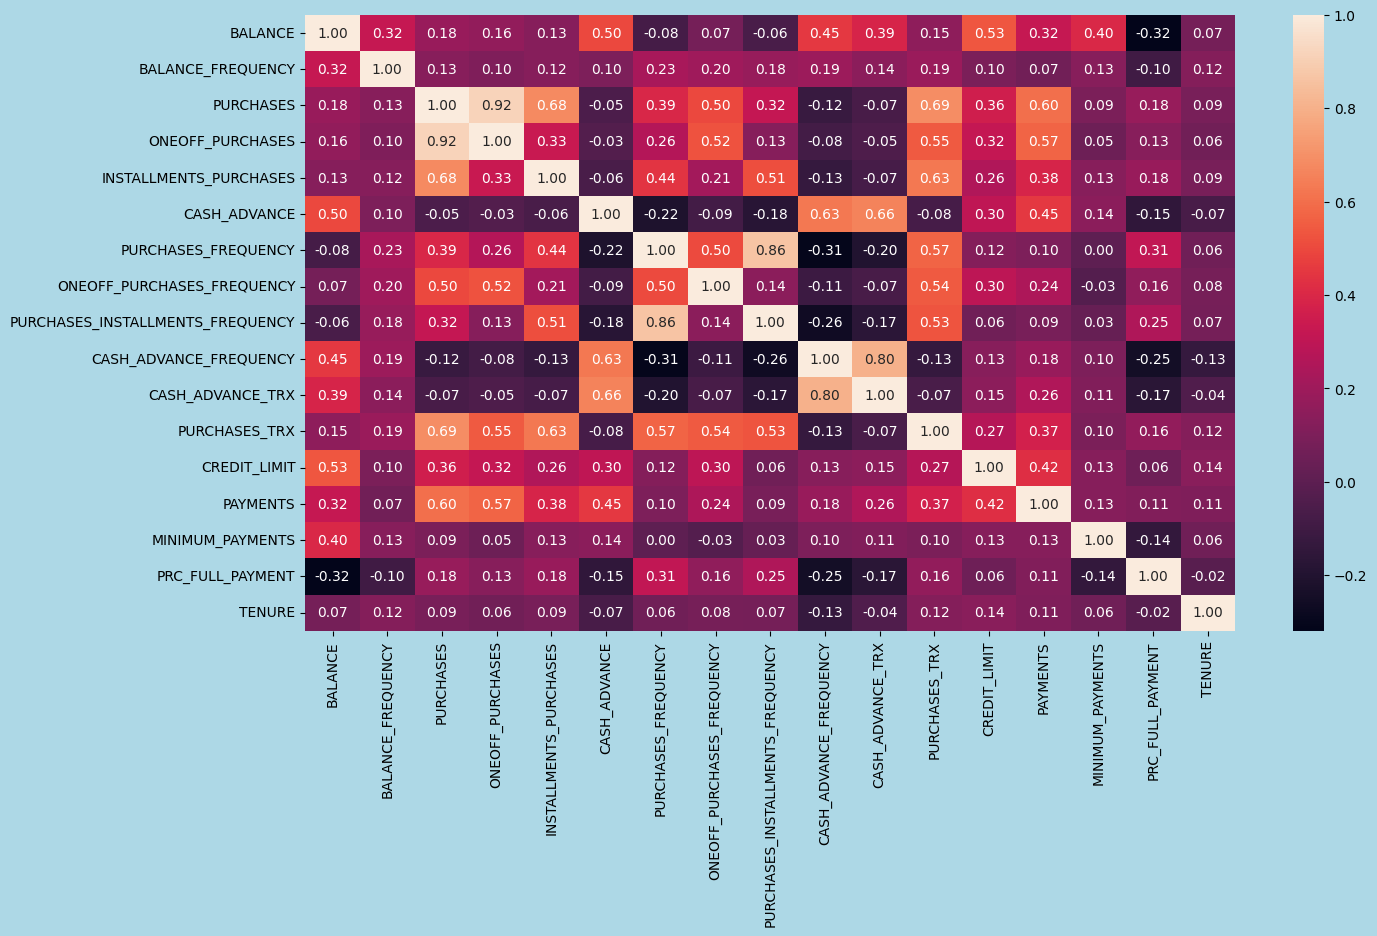

In [ ]:
plot_correlation_matrix(df)
#fig = plt.figure(figsize = (15, 8), facecolor='lightblue')
#sns.heatmap(df.corr() , annot=True , fmt=".2f")

In [ ]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


###Interpretation of Results

#### MISSING DATA

**Overall Missing Data:**

Most columns in the dataset have no missing values at all, which is a good sign.

**Columns with Missing Data:**

CREDIT_LIMIT: This column has 1 missing value, which accounts for 0.01% of the data. This is a very small proportion and might not have a significant impact in the analysis.
MINIMUM_PAYMENTS: This column has 313 missing values, which corresponds to 3.5% of the data. While this is still a relatively low percentage, it’s more substantial than the missing data in the CREDIT_LIMIT column.
We will analyze in deep the variable first and the relation with other variable to impute or drop it.

**Actions:**

For CREDIT_LIMIT, since only one value is missing, we will drop the row.
For MINIMUM_PAYMENTS:
Analysis: We will analyze the relation of these variable with others as PAYMENT, to fill the missing values. After these we will analyze and use a method to impute the data (methods like replace the value with statistic as mean, median, or k-nearest neighbors imputation).

#### OUTLIERS
**High Skewness and Kurtosis**:

- PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PAYMENTS, MINIMUM_PAYMENTS:

  These columns show high positive skewness and kurtosis, indicating that most users have low values in these categories, but there are a few who have very high values. This results in many extreme outliers.

  The large number of outliers (e.g., 808 in PURCHASES, 1030 in CASH_ADVANCE) suggests that the distributions are heavily tailed.

**Columns with No Outliers (or Zero)**:

- PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, TENURE:

  These variables show either no outliers or a very specific distribution (e.g., TENURE is very tightly clustered around 12 with many data points, hence a large number of outliers based on the IQR method).

  The fact that these variables have zero or few outliers suggests a more uniform distribution within the boundaries set by IQR.

**Columns with a Large Number of Outliers**:

- BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE:

  The large number of outliers in these columns could be due to a few users having significantly higher balances, purchases, or cash advances.
  These outliers might represent important segments (e.g., high-value customers) that should be considered separately in the analysis.

**Next Steps and Recommendations**:

**Handling Outliers**:

- Transformation Techniques:

  Apply transformations (e.g., log transformation) to normalize the data and reduce skewness. This can make the data more suitable for analysis, particularly for models that assume normality.
  For example, applying a log transformation to PURCHASES or CASH_ADVANCE can reduce their skewness.

- Handling Missing Data in Outlier Columns:

  If columns like MINIMUM_PAYMENTS have both missing values and a high number of outliers, consider imputation methods that account for outliers, such as using median rather than mean, or more advanced techniques like multiple imputation.

#### CORRELATION
The correlation matrix provides insights into the relationships between the different variables in the dataset. Here are the key takeaways and possible actions:

**Strong Correlations:**

- PURCHASES and ONEOFF_PURCHASES (0.92):

  A very high positive correlation suggests that customers who make a lot of purchases tend to make a lot of one-off purchases. This could indicate that a single factor is driving both behaviors, or that these two features might be capturing the same information. We will consider combining these features or using dimensionality reduction techniques like PCA to address potential multicollinearity.

- CASH_ADVANCE and CASH_ADVANCE_FREQUENCY (0.63) & CASH_ADVANCE_TRX (0.66):

  These strong correlations indicate that as the amount of cash advances increases, so do the frequency and number of transactions. This makes sense logically, but it also means these variables are not entirely independent of each other.

- PURCHASES and PURCHASES_FREQUENCY (0.39):

  Moderate positive correlation suggests that higher purchases are associated with higher purchase frequency. This relationship makes sense and can be a useful feature for clustering customer behavior.

**Negative Correlations:**
- PRC_FULL_PAYMENT and BALANCE (-0.32):

  This negative correlation suggests that customers who frequently pay their balance in full tend to have lower balances, which is logical. This feature can be significant when identifying customer segments based on payment behavior.

- PRC_FULL_PAYMENT and CASH_ADVANCE_FREQUENCY (-0.25):

  Negative correlation implies that customers who frequently pay their full balance are less likely to rely on cash advances. This could indicate different financial behavior or stability between customer groups.

**Weak or No Correlations:**
- TENURE with Most Variables:
  The TENURE column has weak correlations with most other features, indicating that the length of time a customer has had the account doesn't strongly influence their spending or payment behavior. However, tenure might still be a useful segmentation variable depending on the business context.

**Potential Multicollinearity:**

**High Correlation Groups:**

- PURCHASES, ONEOFF_PURCHASES, and PURCHASES_TRX: These features are moderately to highly correlated. Multicollinearity could be an issue, which can distort the results of clustering algorithms. Consider dimension reduction methods or combining similar features to reduce redundancy.
- CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, and CASH_ADVANCE_TRX: These are also highly correlated. Again, it is good to consider reducing the number of related features or using techniques to reduce dimensionality.

**Actions:*
- Dimensionality Reduction: Given the presence of correlated variables, we might consider techniques like PCA (Principal Component Analysis) to reduce the dimensionality of the dataset. This will help in simplifying the dataset while retaining as much variance as possible.
- Transformation: Apply logarithmic transformations to variables with high skewness to reduce the impact of extreme values on clustering.

- Clustering Preparation:

  - Normalization/Standardization: Standardize or normalize the data before applying clustering techniques. This will ensure that variables with larger ranges do not dominate the clustering process.
  - Select Features for Clustering: Based on the correlation analysis, we will select the most relevant and independent features for clustering. But first we will apply PCA to reduce highly correlated variables.

##DATA CLEANING

**MISSING DATA**

In [48]:
# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [49]:
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [50]:
# MINIMUM_PAYMENTS has so much missing value so it is reasonable to find a solution for fill them
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


In [51]:
#The value of zero should be used for MINIMUM_PAYMENTS's cells Who they haven't done any payments so if PAYMENTS = 0 then MINIMUM_PAYMENTS = 0

# Step 1: Identify rows with NaN in 'MINIMUM_PAYMENTS'
nan_min_payments = df['MINIMUM_PAYMENTS'].isna()

# Step 2: Check where 'PAYMENTS' is 0 and 'MINIMUM_PAYMENTS' is NaN
condition = (df['PAYMENTS'] == 0) & nan_min_payments

# Step 3: Replace NaN in 'MINIMUM_PAYMENTS' with 0 where 'PAYMENTS' is 0
df.loc[condition, 'MINIMUM_PAYMENTS'] = 0

In [9]:
missing_data(df).style.highlight_max(color = 'green', axis = 0)

,name of column,types,unique_data,missing value,missing percentage
0,BALANCE,float64,8870,0,0.000000
1,BALANCE_FREQUENCY,float64,43,0,0.000000
2,PURCHASES,float64,6203,0,0.000000
3,ONEOFF_PURCHASES,float64,4014,0,0.000000
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000
5,CASH_ADVANCE,float64,4322,0,0.000000
6,PURCHASES_FREQUENCY,float64,47,0,0.000000
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000


<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

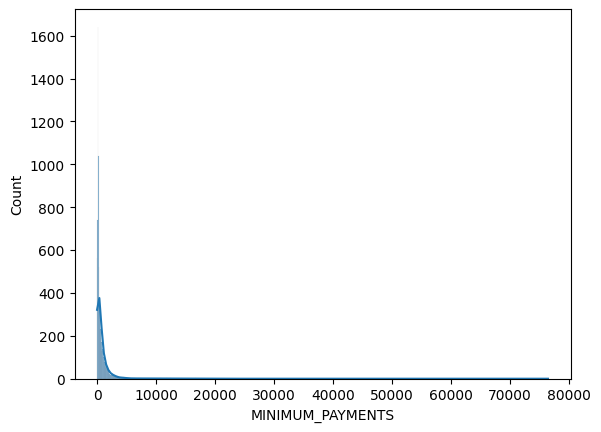

In [10]:
import seaborn as sns
sns.histplot(df['MINIMUM_PAYMENTS'], kde=True)

The distribution is skewed, so median imputation is preferred as the median is less sensitive to outliers than the mean.

In [52]:
df.fillna(df.median() , inplace = True)

In [53]:
missing_data(df).style.highlight_max(color = 'green', axis = 0)

,name of column,types,unique_data,missing value,missing percentage
0,BALANCE,float64,8870,0,0.000000
1,BALANCE_FREQUENCY,float64,43,0,0.000000
2,PURCHASES,float64,6203,0,0.000000
3,ONEOFF_PURCHASES,float64,4014,0,0.000000
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000
5,CASH_ADVANCE,float64,4322,0,0.000000
6,PURCHASES_FREQUENCY,float64,47,0,0.000000
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000


Data

In [13]:
analyze_dataset_numerical(df).style.highlight_max(color = 'green', axis = 0)

,column,n,min,max,mean,std,median,q1,q3,iqr,skewness,kurtosis,lower_fence,upper_fence,n_outliers
0,BALANCE,8949,0.000000,19043.138560,1564.647593,2081.584016,873.680279,128.365782,2054.372848,1926.007066,2.392869,7.669089,-2760.644817,4943.383447,695
1,BALANCE_FREQUENCY,8949,0.000000,1.000000,0.877350,0.236798,1.000000,0.888889,1.000000,0.111111,-2.023854,3.095206,0.722223,1.166666,1492
2,PURCHASES,8949,0.000000,49039.570000,1003.316936,2136.727848,361.490000,39.800000,1110.170000,1070.370000,8.142604,111.317027,-1565.755000,2715.725000,808
3,ONEOFF_PURCHASES,8949,0.000000,40761.250000,592.503572,1659.968851,38.000000,0.000000,577.830000,577.830000,10.042938,164.079674,-866.745000,1444.575000,1013
4,INSTALLMENTS_PURCHASES,8949,0.000000,22500.000000,411.113579,904.378205,89.000000,0.000000,468.650000,468.650000,7.297600,96.512552,-702.975000,1171.625000,867
5,CASH_ADVANCE,8949,0.000000,47137.211760,978.959616,2097.264344,0.000000,0.000000,1113.868654,1113.868654,5.165457,52.863880,-1670.802981,2784.671635,1030
6,PURCHASES_FREQUENCY,8949,0.000000,1.000000,0.490405,0.401360,0.500000,0.083333,0.916667,0.833334,0.059960,-1.638366,-1.166668,2.166668,0
7,ONEOFF_PURCHASES_FREQUENCY,8949,0.000000,1.000000,0.202480,0.298345,0.083333,0.000000,0.300000,0.300000,1.535196,1.160000,-0.450000,0.750000,782
8,PURCHASES_INSTALLMENTS_FREQUENCY,8949,0.000000,1.000000,0.364478,0.397451,0.166667,0.000000,0.750000,0.750000,0.508938,-1.398687,-1.125000,1.875000,0
9,CASH_ADVANCE_FREQUENCY,8949,0.000000,1.500000,0.135141,0.200132,0.000000,0.000000,0.222222,0.222222,1.828338,3.331658,-0.333333,0.555555,525


##DATA PREPARATION

**Standardization**

In [54]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your pandas DataFrame with all numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

**PCA**

In [55]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # This keeps enough components to explain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

# To see the amount of variance each component explains
explained_variance = pca.explained_variance_ratio_

# to see the cumulative variance explained
cumulative_variance = explained_variance.cumsum()

# Transform the scaled data into principal components
principal_df = pd.DataFrame(data=principal_components)

# Assign Proper Names to the Principal Components
# Assuming you have 'n' principal components
num_components = principal_df.shape[1]
principal_df.columns = [f'PC{i+1}' for i in range(num_components)]

In [56]:
print(explained_variance)


[0.27298502 0.20317663 0.08821402 0.07478978 0.06213303 0.05733518
 0.04881999 0.04315878 0.03787951 0.03080103 0.02372483 0.01773507]


In [57]:
print(cumulative_variance)

[0.27298502 0.47616165 0.56437567 0.63916545 0.70129848 0.75863366
 0.80745366 0.85061243 0.88849194 0.91929297 0.9430178  0.96075287]


**Visualizing Explained Variance**

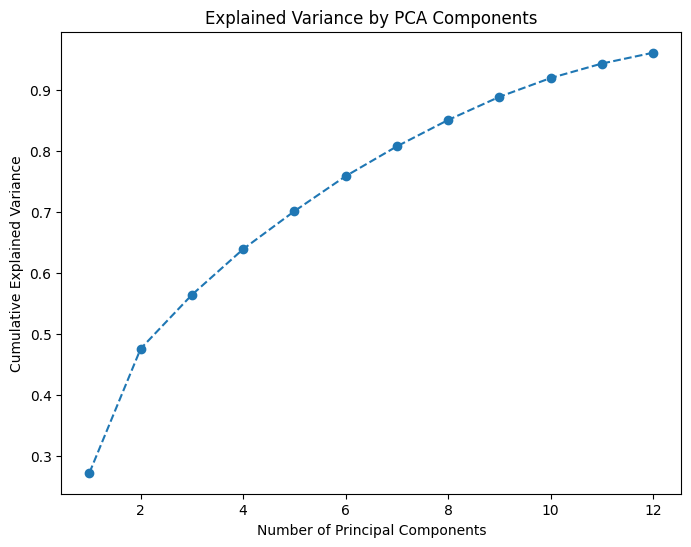

In [58]:
import matplotlib.pyplot as plt

# Plotting the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

In [59]:
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.684314,-1.070768,0.471984,0.684865,0.052306,0.078428,0.818269,-0.011086,0.119339,-0.078727,-0.236206,-0.051912
1,-1.133114,2.509979,0.603254,-0.104770,0.691854,-1.081089,-0.389011,0.189675,0.670419,-0.778600,-0.870321,-0.609628
2,0.968927,-0.383530,0.088842,1.246863,-2.162193,-0.376489,-1.528326,-0.245154,-0.864233,-0.001260,-0.762383,0.683952
3,-0.897179,-0.017775,1.528595,1.028845,0.183848,-0.200462,-0.211113,-0.762676,-0.018590,0.393368,0.749350,0.100636
4,-1.600472,-0.682058,0.342960,1.021378,-0.442195,0.079080,0.693015,0.257740,0.576341,-0.122857,-0.455099,-0.109460


**PCA LOADING**

In [60]:
# Get the principal components and create a DataFrame:
original_feature_names = df.columns.tolist()
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
# Display the PCA components with the original feature names
print(pca_components)

     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   0.101916           0.120518   0.411556          0.346324   
1   0.403766           0.131671   0.039702          0.061614   
2  -0.161962          -0.423569   0.257197          0.390394   
3   0.277990           0.157764   0.042174          0.086918   
4   0.051138          -0.474342   0.025307         -0.163664   
5   0.044140           0.014744   0.182782          0.177777   
6  -0.255128           0.098873   0.198692          0.119968   
7  -0.171453           0.290274   0.027746          0.127582   
8   0.126692           0.615232   0.104666          0.012577   
9   0.031509          -0.082246   0.051093         -0.175279   
10  0.149104          -0.118777   0.200787          0.448286   
11 -0.480823           0.089613   0.074500         -0.052536   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.336761     -0.022675             0.321138   
1                -0.019380      0.438

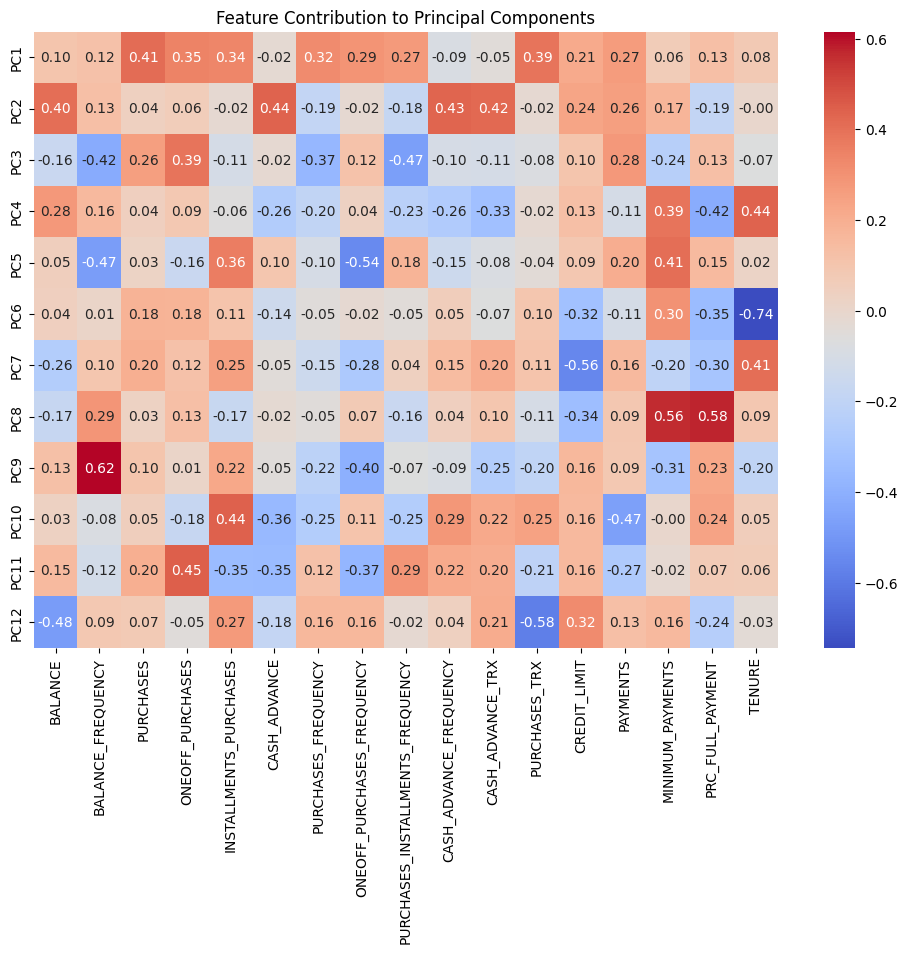

In [61]:
#PCA Loadings
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pca_heatmap(pca_components):
    plt.figure(figsize=(12, 8))
    sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt=".2f",
                yticklabels=[f'PC{i+1}' for i in range(pca_components.shape[0])],
                xticklabels=original_feature_names)
    plt.title("Feature Contribution to Principal Components")
    plt.show()

# Example usage:
plot_pca_heatmap(pca_components)

**Insights from PCA Loadings**

Principal Component 1 (PC1):

- High Positive Loadings: PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, PURCHASES_TRX

  Insight: PC1 seems to capture overall purchasing behavior, especially related to one-off purchases, installment purchases, and transaction frequency. Customers with high values in PC1 are likely to have high spending and frequent purchasing activity.

Principal Component 2 (PC2):
- High Positive Loadings: BALANCE, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX

  Insight: PC2 is associated with cash advance behavior. Customers with high values in PC2 tend to rely more on cash advances, both in terms of frequency and amount.

Principal Component 3 (PC3):
- High Positive Loadings: BALANCE_FREQUENCY, CREDIT_LIMIT, PAYMENTS
- High Negative Loadings: MINIMUM_PAYMENTS
  
  Insight: PC3 might be capturing credit management behavior. High values in PC3 suggest customers with higher balances, credit limits, and payments, but lower minimum payments, possibly indicating good credit management.

Principal Component 4 (PC4):
- High Positive Loadings: TENURE, PAYMENTS
- High Negative Loadings: BALANCE_FREQUENCY, CREDIT_LIMIT

  Insight: PC4 might be capturing long-term customer behavior and payment consistency. High values in PC4 suggest longer tenure and consistent payments, with a focus on maintaining credit balance over time.


**Interpreting Principal Components**

Given these interpretations, we can infer that:

- PC1 is a strong indicator of overall spending and purchasing habits.
- PC2 is tied to reliance on cash advances, which might indicate financial stress or a specific need for liquidity.
- PC3 and PC4 are more related to credit management and customer tenure.

# III. CLUSTERING

**Functions to plot results**

In [62]:
def plot_cluster_distribution(data, cluster_column='Cluster', figsize=(14, 6)):
    """
    Plot the cluster distribution as both a bar plot and a pie chart using elegant pastel colors.

    Parameters:
    - data: pandas DataFrame containing the dataset
    - cluster_column: name of the column containing cluster labels (default: 'Cluster')
    - figsize: tuple specifying the figure size (default: (14, 6))
    """
    # Count the occurrences of each cluster
    cluster_counts = data[cluster_column].value_counts().sort_index()

    # Create a custom pastel color palette
    pastel_colors = sns.color_palette("pastel")

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Bar plot
    cluster_counts.plot(kind='bar', ax=ax1, color=pastel_colors)
    ax1.set_title('Cluster Distribution', fontsize=16)
    ax1.set_xlabel('Cluster', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='x', rotation=0)

    # Add value labels on top of each bar
    for i, v in enumerate(cluster_counts):
        ax1.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

    # Pie chart
    wedges, texts, autotexts = ax2.pie(cluster_counts,
                                       labels=cluster_counts.index,
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       colors=pastel_colors)
    ax2.set_title('Cluster Distribution (%)', fontsize=16)

    # Enhance the appearance of the pie chart text
    plt.setp(autotexts, size=10, weight="bold")
    plt.setp(texts, size=12)

    # Add a legend to the pie chart
    ax2.legend(wedges, cluster_counts.index,
               title="Clusters",
               loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a pandas DataFrame named 'df' with a 'Cluster' column
# plot_cluster_distribution(df)


def plot_cluster_pairplot(data, features, cluster_col='Cluster'):
    plt.style.use("bmh")
    plt.rcParams['figure.facecolor'] = 'lightgrey'

    # Ensure the cluster column is included in the features list
    if cluster_col not in features:
        features.append(cluster_col)

    sns.pairplot(data[features], hue=cluster_col, corner=True, palette="bright")
    plt.suptitle("Pairplot of Clusters Across Selected Features", y=1.02)
    plt.show()


def plot_metrics_comparison(metrics_df):
    # Use the 'grayscale' style for the plot
    plt.style.use('grayscale')
    fig, axs = plt.subplots(2, 2, figsize=(12, 7))

    # List of metrics to plot
    metrics = ['Inertia', 'Silhouette_Score', 'Davies_Bouldin_Score', 'Calinski_Harabasz_Score']

    # Iterate over subplots and plot each metric from the DataFrame
    for i in range(2):
        for j in range(2):
            index = i * 2 + j
            if index < len(metrics):
                metric_name = metrics[index]
                axs[i, j].plot(metrics_df['Num_Clusters'], metrics_df[metric_name], marker='o')
                axs[i, j].set_xticks(metrics_df['Num_Clusters'])
                axs[i, j].set_xlabel('Number of Clusters')
                axs[i, j].set_ylabel(metric_name)
                axs[i, j].set_title(metric_name)
                axs[i, j].grid(True)

    # Adjust the layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_metrics_comparison(metrics_df)

## KMEANS

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Assuming `principal_df` is the PCA-transformed DataFrame
data = principal_df.values

# Function to evaluate the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    inertia = []
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []  # Add list for Calinski-Harabasz scores

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)

        # Calculate evaluation metrics
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(data, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(data, cluster_labels))  # Calculate and append Calinski-Harabasz score

    return inertia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores

# Evaluate clusters from 2 to 10
max_clusters = 10
inertia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = evaluate_clusters(data, max_clusters=max_clusters)

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Num_Clusters': range(2, max_clusters + 1),
    'Inertia': inertia,
    'Silhouette_Score': silhouette_scores,
    'Davies_Bouldin_Score': davies_bouldin_scores,
    'Calinski_Harabasz_Score': calinski_harabasz_scores  # Add Calinski-Harabasz scores to the DataFrame
})

# Print the metrics DataFrame
print(metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

   Num_Clusters        Inertia  Silhouette_Score  Davies_Bouldin_Score  \
0             2  121808.902002          0.218287              1.863556   
1             3  106041.739302          0.253526              1.545279   
2             4   93135.921911          0.207839              1.527100   
3             5   85561.419609          0.204656              1.500713   
4             6   78912.943344          0.214744              1.455669   
5             7   73587.505848          0.227987              1.344973   
6             8   68610.153850          0.234560              1.314603   
7             9   65253.561303          0.229715              1.359191   
8            10   60708.846872          0.237046              1.266332   

   Calinski_Harabasz_Score  
0              1788.783851  
1              1692.342805  
2              1697.591734  
3              1583.697218  
4              1524.237281  
5              1469.821669  
6              1443.758166  
7              1385.601610 

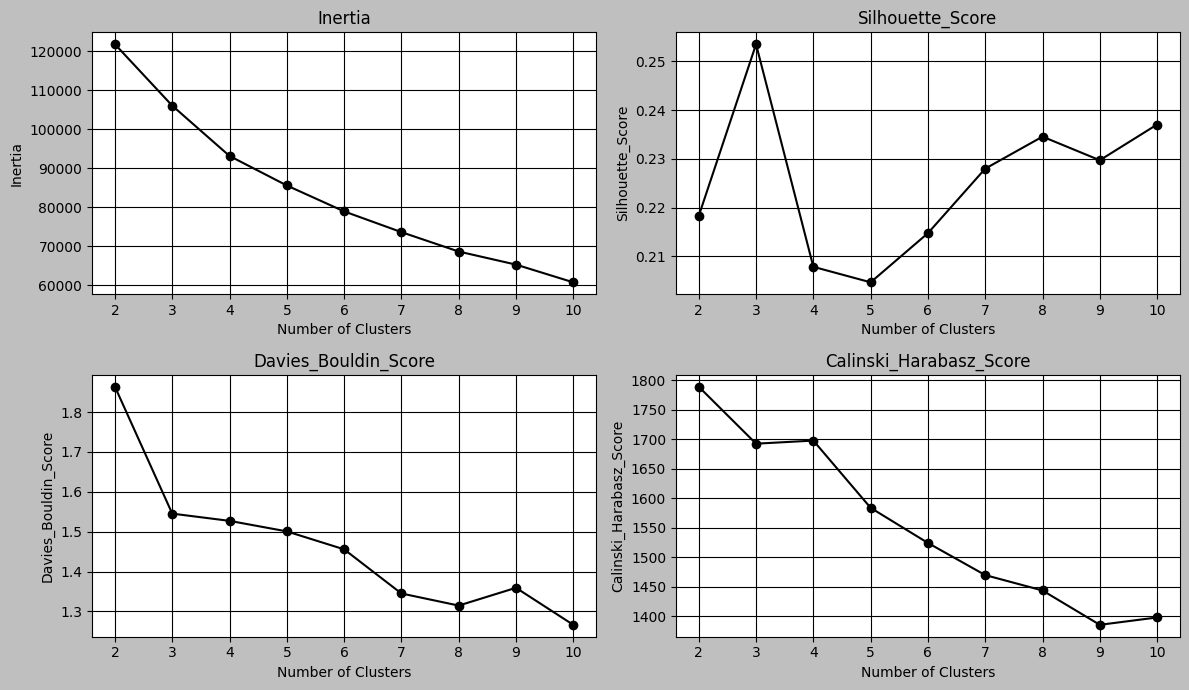

In [22]:
plot_metrics_comparison(metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


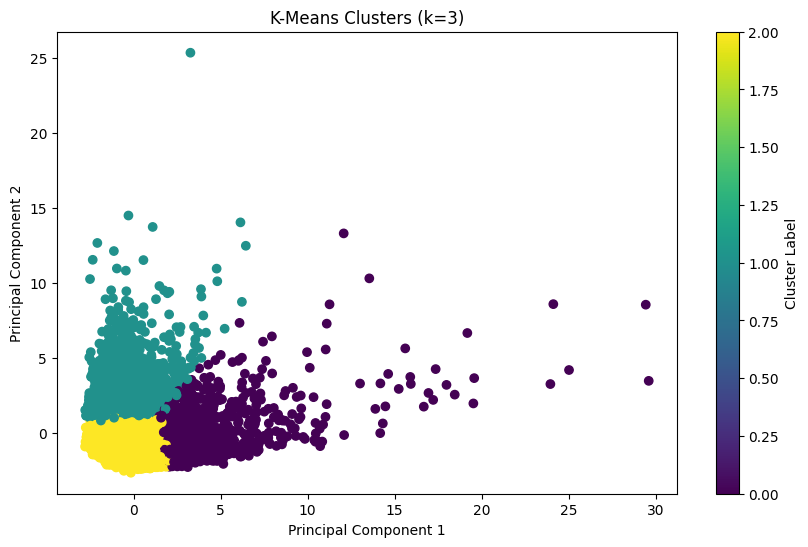

In [64]:
# Based on the evaluation metrics, choose the optimal number of clusters (e.g., based on Elbow and Silhouette)
optimal_clusters = 3  # Replace this with the observed optimal number from your analysis

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

# Plot the clusters
if data.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clusters (k={optimal_clusters})')
    plt.colorbar(label='Cluster Label')
    plt.show()

In [24]:
print(principal_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.684314 -1.070768  0.471984  0.684865  0.052306  0.078428  0.818269   
1 -1.133114  2.509979  0.603254 -0.104770  0.691854 -1.081089 -0.389011   
2  0.968927 -0.383530  0.088842  1.246863 -2.162193 -0.376489 -1.528326   
3 -0.897179 -0.017775  1.528595  1.028845  0.183848 -0.200462 -0.211113   
4 -1.600472 -0.682058  0.342960  1.021378 -0.442195  0.079080  0.693015   

        PC8       PC9      PC10      PC11      PC12  Cluster  
0 -0.011086  0.119339 -0.078727 -0.236206 -0.051912        2  
1  0.189675  0.670419 -0.778600 -0.870321 -0.609628        1  
2 -0.245154 -0.864233 -0.001260 -0.762383  0.683952        2  
3 -0.762676 -0.018590  0.393368  0.749350  0.100636        2  
4  0.257740  0.576341 -0.122857 -0.455099 -0.109460        2  


In [65]:
#choosing better parameters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initial parameters
best_silhouette = -1
best_params = {}

# Trying different parameters
for init_method in ['k-means++', 'random']:
    for n_init_value in [10, 20]:
        for max_iter_value in [300, 500]:
            for algorithm_choice in ['lloyd', 'elkan']:
                kmeans = KMeans(
                    n_clusters=3,
                    init=init_method,
                    n_init=n_init_value,
                    max_iter=max_iter_value,
                    algorithm=algorithm_choice,
                    random_state=42
                )
                cluster_labels = kmeans.fit_predict(data)
                silhouette_avg = silhouette_score(data, cluster_labels)

                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_params = {
                        'init': init_method,
                        'n_init': n_init_value,
                        'max_iter': max_iter_value,
                        'algorithm': algorithm_choice
                    }

print("Best Silhouette Score: ", best_silhouette)
print("Best Parameters: ", best_params)

Best Silhouette Score:  0.25352633921740586
Best Parameters:  {'init': 'k-means++', 'n_init': 10, 'max_iter': 300, 'algorithm': 'lloyd'}


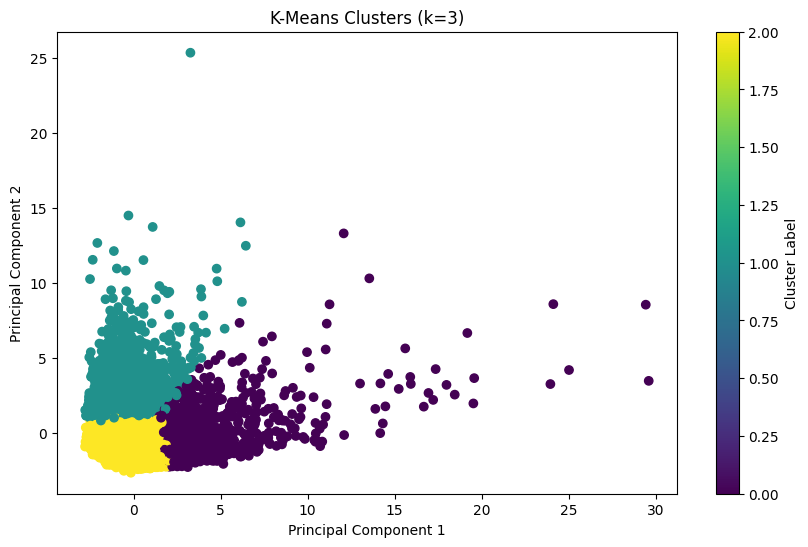

In [66]:
# Based on the evaluation of parameters,
optimal_clusters = 3  # Replace this with the observed optimal number from your analysis

# Apply K-Means with the optimal parameters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, init = 'k-means++', n_init=10, max_iter= 300,algorithm= 'lloyd' )
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

# Plot the clusters (if using 2 or 3 components for visualization)
if data.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clusters (k={optimal_clusters})')
    plt.colorbar(label='Cluster Label')
    plt.show()

In [67]:
df['Cluster']= principal_df['Cluster']
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [68]:
df_count = principal_df.groupby(by=["Cluster"]).size().reset_index(name="counts")
df_count

,Cluster,counts
0,0,1250
1,1,1598
2,2,6101


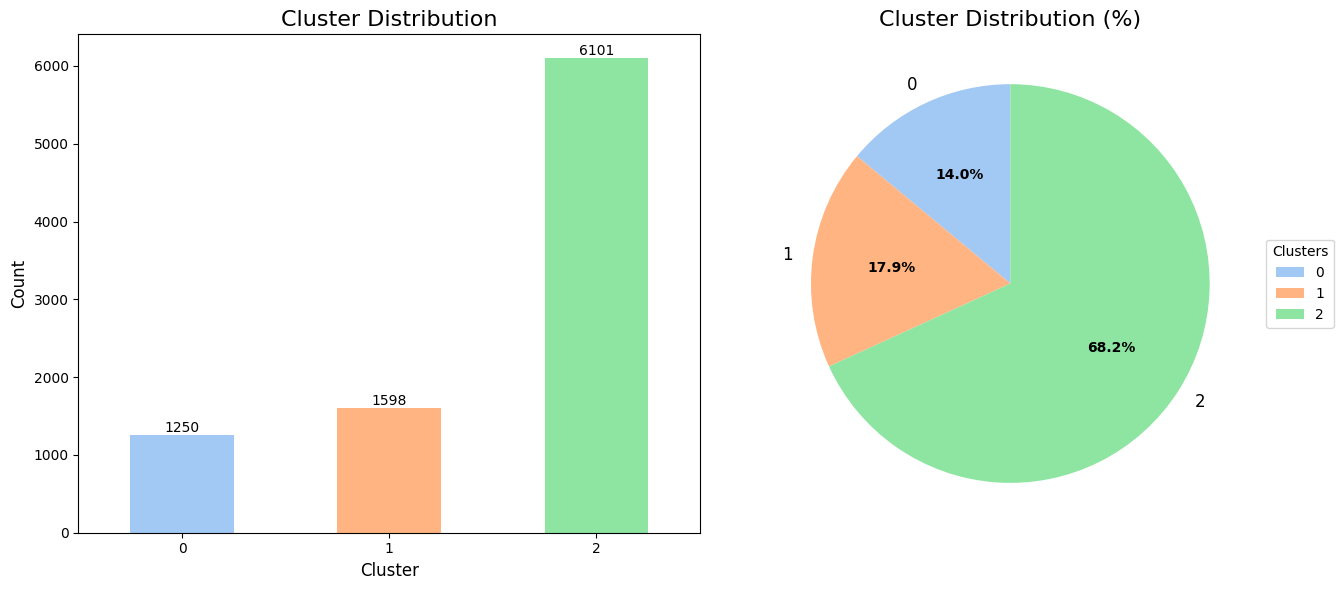

In [69]:
plot_cluster_distribution(principal_df)

### Interpretation

#### **Statistical Summary by Cluster**

In [70]:
def cluster_statistics(df, cluster_col='Cluster'):
    # Initialize a dictionary to hold the results
    stats_dict = {}

    # Iterate over each feature column in the DataFrame
    for column in df.columns:
        if column != cluster_col:  # Skip the Cluster column
            # Group by the cluster and calculate the desired statistics
            stats = df.groupby(cluster_col)[column].agg(
                mean='mean',
                median='median',
                Q1=lambda x: x.quantile(0.25),
                Q3=lambda x: x.quantile(0.75),
                IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),  # Interquartile Range
                min='min',
                max='max',
                std='std',
                outliers=lambda x: ((x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) |
                                    (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))))).sum()
            ).reset_index()

            # Store the result in the dictionary with the column name as the key
            stats_dict[column] = stats

    return stats_dict

# Example usage:
# Assuming df is your DataFrame with the 'Cluster' column
cluster_stats = cluster_statistics(df)
print('BALANCE')
print(cluster_stats['BALANCE'])
print('BALANCE_FREQUENCY')
print(cluster_stats['BALANCE_FREQUENCY'])
print('PURCHASES')
print(cluster_stats['PURCHASES'])
print('ONEOFF_PURCHASES')
print(cluster_stats['ONEOFF_PURCHASES'])
print('INSTALLMENTS_PURCHASES')
print(cluster_stats['INSTALLMENTS_PURCHASES'])
print('CASH_ADVANCE')
print(cluster_stats['CASH_ADVANCE'])
print('ONEOFF_PURCHASES_FREQUENCY')
print(cluster_stats['ONEOFF_PURCHASES_FREQUENCY'])
print('PURCHASES_INSTALLMENTS_FREQUENCY')
print(cluster_stats['PURCHASES_INSTALLMENTS_FREQUENCY'])
print('CASH_ADVANCE_FREQUENCY')
print(cluster_stats['CASH_ADVANCE_FREQUENCY'])
print('CASH_ADVANCE_TRX')
print(cluster_stats['CASH_ADVANCE_TRX'])
print('PURCHASES_TRX')
print(cluster_stats['PURCHASES_TRX'])
print('CREDIT_LIMIT')
print(cluster_stats['CREDIT_LIMIT'])
print('PAYMENTS')
print(cluster_stats['PAYMENTS'])
print('MINIMUM_PAYMENTS')
print(cluster_stats['MINIMUM_PAYMENTS'])
print('PRC_FULL_PAYMENT')
print(cluster_stats['PRC_FULL_PAYMENT'])
print('TENURE')
print(cluster_stats['TENURE'])

BALANCE
   Cluster         mean       median           Q1           Q3          IQR  \
0        0  2208.625976  1201.233162   358.388258  3151.240074  2792.851816   
1        1  3980.911279  3452.698304  1876.133586  5556.573478  3680.439892   
2        2   799.828326   425.549034    57.408695  1242.886266  1185.477571   

         min           max          std  outliers  
0  12.423203  19043.138560  2585.127136        68  
1   4.382924  16304.889250  2675.070034        32  
2   0.000000   5941.271179   956.406639       209  
BALANCE_FREQUENCY
   Cluster      mean  median        Q1   Q3       IQR       min  max  \
0        0  0.981408     1.0  1.000000  1.0  0.000000  0.090909  1.0   
1        1  0.958450     1.0  1.000000  1.0  0.000000  0.181818  1.0   
2        2  0.834788     1.0  0.727273  1.0  0.272727  0.000000  1.0   

        std  outliers  
0  0.073929       120  
1  0.113766       287  
2  0.268313       507  
PURCHASES
   Cluster         mean    median         Q1         Q

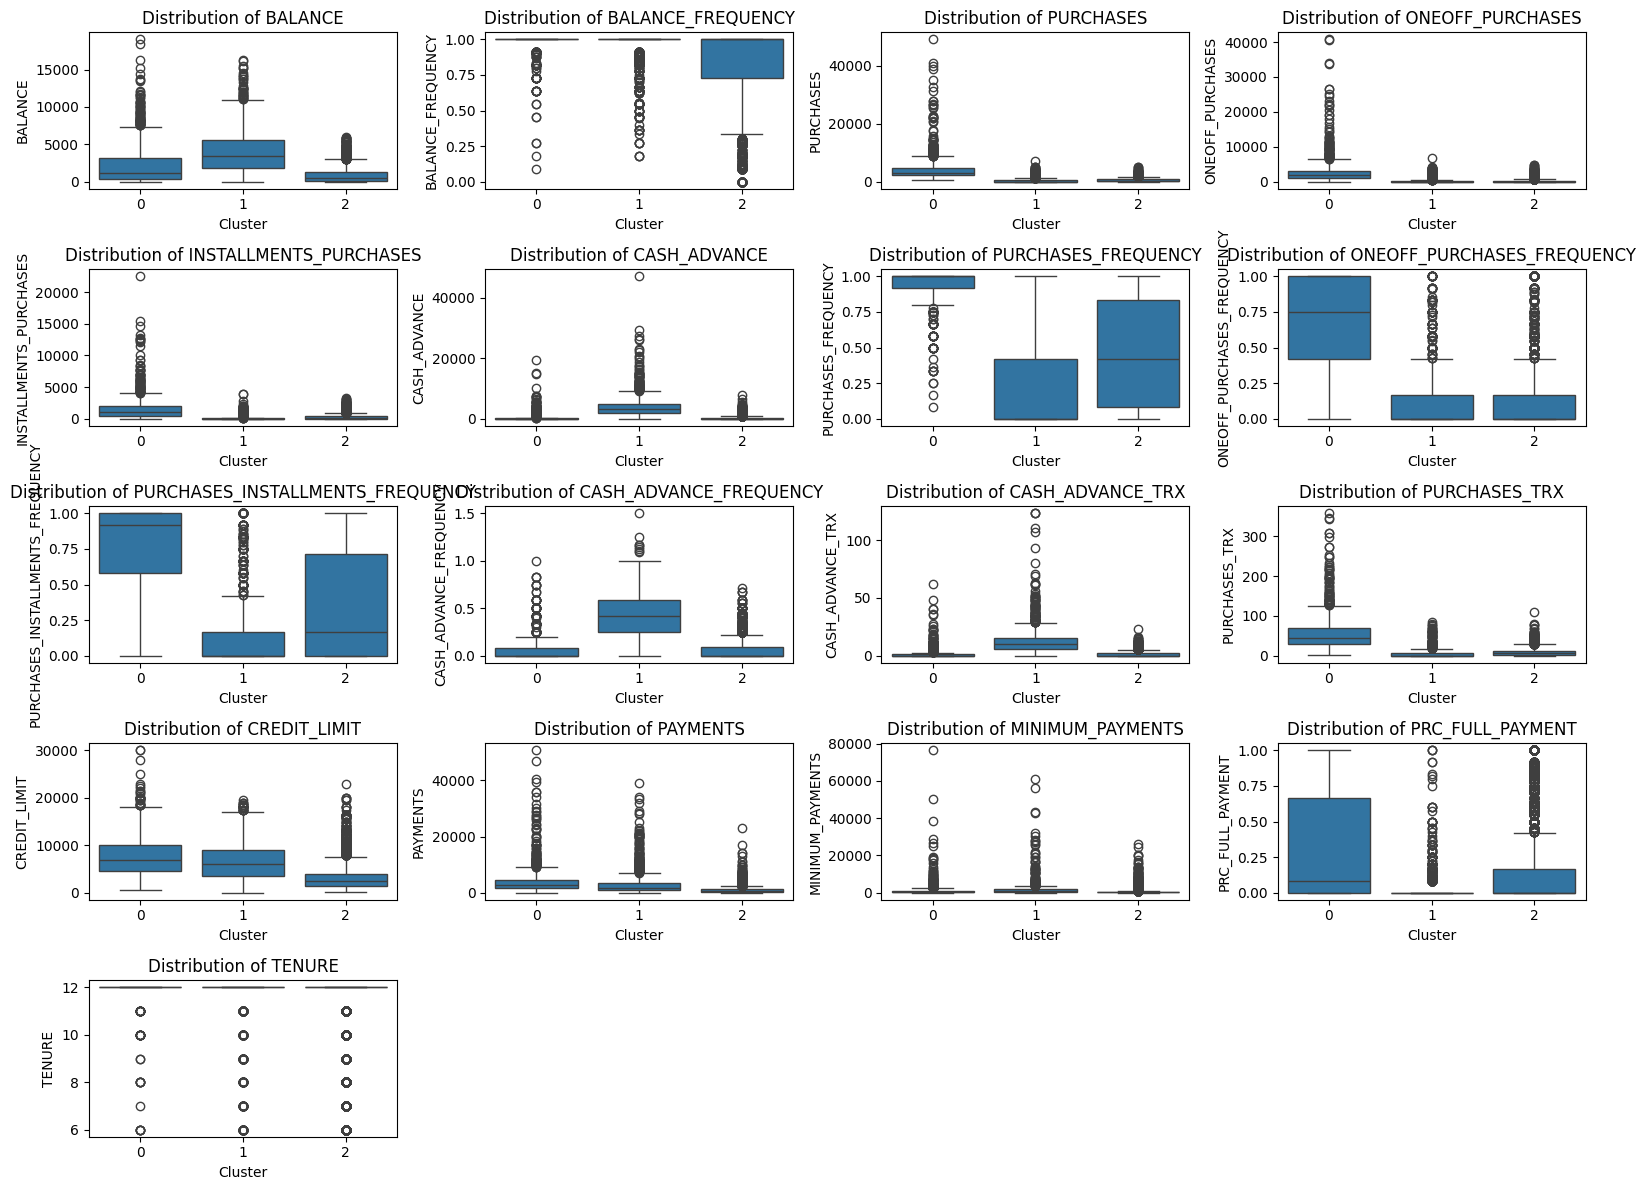

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_all_features_by_cluster(df, cluster_column='Cluster', plots_per_row=4, figsize=(16, 12)):
    """
    Plots the distribution of all features in the dataset by cluster using boxplots arranged in a grid.

    Parameters:
        df (pd.DataFrame): The dataframe containing features and cluster assignments.
        cluster_column (str): The column name representing the cluster assignment.
        plots_per_row (int): Number of plots per row.
        figsize (tuple): The overall figure size.
    """
    # List of features to plot
    features = [col for col in df.columns if col != cluster_column]

    # Determine the number of rows needed
    num_features = len(features)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row  # Ceiling division

    # Create a figure with the calculated number of subplots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over

    for i, feature in enumerate(features):
        sns.boxplot(x=cluster_column, y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')

    # Remove any unused axes if the number of features isn't a perfect multiple of plots_per_row
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



plot_all_features_by_cluster(df)

**Statistical interpretation**

**Cluster 0:**


- Balance: High average balance of 2208.63, suggesting that customers in this cluster tend to maintain relatively large balances. The wide IQR (2792.85) and the presence of 68 outliers suggest some variability within this group, but overall, they maintain high balances.

- Balance Frequency: Very high average balance frequency of 0.981, indicating that customers in this cluster consistently maintain their balances, likely making frequent payments to keep their accounts in good standing.

- Purchases: Very high average purchases (4239.13), particularly in one-off purchases (2701.79), indicating that these customers frequently make large one-time purchases. This cluster is characterized by active spending behavior.

- Installment Purchases: High at 1537.82, showing a preference for spreading out payments over time for larger purchases. This indicates comfort with managing debt through installments.

- Cash Advance: Low average cash advance usage (458.88), suggesting these customers rely more on their credit for purchases rather than taking out cash advances. The low median of 0.0 confirms that many customers in this cluster do not use cash advances at all.

- Purchase Frequency: High purchase frequency (0.739 for installments), indicating that these customers frequently engage in transactions, likely due to their high purchasing power.

- Credit Limit: Highest average credit limit among the clusters (7705.40), indicating that these are likely high-value customers who have earned trust from the credit provider.

- Payments: High average payments (4125.52) and substantial minimum payments (1211.44), reflecting strong repayment capacity. This is supported by the high standard deviation, indicating significant variability in payment amounts, possibly due to the large credit limits.

- Full Payment Rate: 30% of the time, customers pay their balance in full, which suggests a good level of financial discipline, though not as high as it could be.

- Tenure: High tenure (11.92), indicating long-standing relationships with the credit provider. This suggests customer loyalty and satisfaction.

Interpretation: Cluster 0 likely represents affluent and financially disciplined customers who make large and frequent purchases. They have high credit limits, manage their finances well, and are loyal customers. They may carry some debt but are generally capable of paying it down.

**Cluster 1:**

- Balance: Highest average balance of 3980.91, indicating these customers tend to maintain very large balances. The high IQR (3680.44) and lower number of outliers suggest this group has consistently large balances.

- Balance Frequency: High balance frequency (0.958), but slightly lower than Cluster 0, suggesting these customers also maintain their balances well but perhaps with slightly less consistency.

- Purchases: Very low average purchases (381.82), with minimal one-off purchases (248.32) and installment purchases (133.58). This indicates that these customers are not actively making purchases, possibly due to financial constraints or a preference for using other forms of payment.

- Cash Advance: Extremely high cash advance usage (3863.93), the highest among all clusters, suggesting heavy reliance on cash advances. This could indicate financial strain or a need for quick liquidity.

- Purchase Frequency: Very low purchase frequency (0.143 for installments), indicating infrequent spending and possibly reflecting financial difficulties or a cautious approach to spending.

- Credit Limit: High but lower than Cluster 0 (6670.53), indicating that while these customers have substantial credit available, they may not use it as effectively as Cluster 0.

- Payments: Moderate payments (3015.86) and higher minimum payments (1779.76) compared to the other clusters. This suggests they might be under financial stress, relying on paying only the minimum due.

- Full Payment Rate: Very low (3.4%), showing that these customers rarely pay their balance in full, which could indicate ongoing debt accumulation and financial stress.

- Tenure: Slightly lower tenure (11.35) than Cluster 0, indicating that these customers might be newer or have less stable relationships with the institution.

Interpretation: Cluster 1 likely represents customers who are financially strained. They maintain high balances, make minimal purchases, and rely heavily on cash advances, which might indicate a need for liquidity or poor financial management. They tend to pay only the minimum amount due, which could lead to longer-term debt issues.

**Cluster 2:**

- Balance: Low average balance of 799.83, indicating lower financial capacity or a conservative spending approach. The low IQR (1185.48) and the high number of outliers suggest variability in balance amounts, with many customers maintaining very low balances.

- Balance Frequency: Moderate balance frequency (0.835), lower than the other clusters, indicating that these customers might not be as consistent in maintaining their balances or may have more variable cash flows.

- Purchases: Moderate average purchases (503.13), with a balanced distribution between one-off purchases (250.49) and installment purchases (252.96). This suggests a cautious but steady spending pattern.

- Cash Advance: Low to moderate cash advance usage (329.87), suggesting that while some customers in this cluster use cash advances, it is not a primary financial tool for most.

- Purchase Frequency: Moderate purchase frequency (0.346 for installments), indicating occasional spending and a balanced approach to managing credit.

- Credit Limit: Lowest average credit limit (3266.61), reflecting lower creditworthiness or less need for large credit limits. This aligns with their lower spending and balance levels.

- Payments: Low payments (907.29) and minimum payments (512.58), indicating limited financial resources or a conservative approach to managing debt.

- Full Payment Rate: Moderate (15.5%), suggesting that some customers in this cluster manage to pay off their balance in full, but it's not a common practice.

- Tenure: Moderate tenure (11.48), slightly higher than Cluster 1, suggesting average customer loyalty and possibly stable but limited financial interactions.

Interpretation: Cluster 2 represents customers with lower financial capacity who make moderate purchases and tend to carry lower balances. They appear to be more financially conservative, with lower credit limits and payments, possibly due to limited credit access or a preference for cautious financial management. They may be newer customers or those with simpler financial needs.

**Features with Minimal Variation:**

Tenure is the feature with the least variation across the clusters. The medians are the same, and the IQR is 0 across all clusters, indicating that nearly all customers have a similar tenure, regardless of the cluster they belong to.

Balance Frequency also has minimal variation, though there is a slight difference in the mean across the clusters, especially between Cluster 2 and the other clusters.

#### Identifying Key Features

Based on the information of statistical we will identify the key features based on the variability across clusters. Features with large variations across clusters are often key features.:

**A. Feature Variability Across Clusters**
- Balance:

  - Cluster 1 has the highest average balance (3980.91), significantly higher than Clusters 0 (2208.63) and 2 (799.83).
  - Cluster 2 has the lowest average balance (799.83), suggesting it represents customers with less financial capacity.
- Purchases:

  - Cluster 0 shows a very high average purchase amount (4239.13), indicating frequent high-value transactions.
  - Cluster 1 has a very low average purchase amount (381.82), suggesting minimal spending.
  - Cluster 2 has a moderate average purchase amount (503.13).

- One-Off Purchases:
  - Cluster 0 again shows high average one-off purchases (2701.79).
  - Cluster 1 has very low one-off purchases (248.32), indicating infrequent large purchases.
  - Cluster 2 also shows low one-off purchases (250.49).

- Installments Purchases:

  - Cluster 0 has the highest average installment purchases (1537.82).
  - Cluster 1 has a very low average (133.58), indicating a lower preference for installment payments.
  - Cluster 2 has a moderate average (252.96).

- Cash Advance:

  - Cluster 1 exhibits extremely high cash advance usage (3863.93), indicating heavy reliance on cash advances.
  - Cluster 0 and Cluster 2 show lower averages, with Cluster 2 (329.87) slightly less than Cluster 0 (458.88).

- Credit Limit:

  - Cluster 0 has the highest average credit limit (7705.40).
  - Cluster 1 has a lower average credit limit (6670.53).
  - Cluster 2 has the lowest average credit limit (3266.61).

- Payments:

  - Cluster 0 has high average payments (4125.52), showing strong repayment behavior.
  - Cluster 1 has moderate payments (3015.86).
  - Cluster 2 has much lower payments (907.29).

- Minimum Payments:

  - Cluster 0 has high average minimum payments (1211.44).
  - Cluster 1 has higher minimum payments compared to Cluster 2 (1779.76 vs. 512.58), suggesting potential financial strain.

- Full Payment Rate:

  - Cluster 0 has a moderate full payment rate (30%).
  - Cluster 1 has a very low rate (3.4%).
  - Cluster 2 has a moderate rate (15.5%).

**B. Key Features Identified: Based on variability and importance, the following features stand out:**

- Balance: Differentiates clusters significantly.
- Purchases: Key to understanding spending behavior.
- Cash Advance: Indicates financial reliance and potential strain.
- Credit Limit: Reflects customer’s credit capacity and potential financial health.
- Payments and Minimum Payments: Show repayment behavior and financial stability.

**Summary**

Based on the statistics, the key features to focus on for each cluster are:

- Balance: Significant differences across clusters.
- Purchases: High variance, especially between Cluster 0 and others.
- Cash Advance: Key indicator of financial behavior.
- Credit Limit: Reflects overall financial capacity.
- Payments and Minimum Payments: Important for understanding repayment patterns.

**Visualize Clusters in PCA Space:**

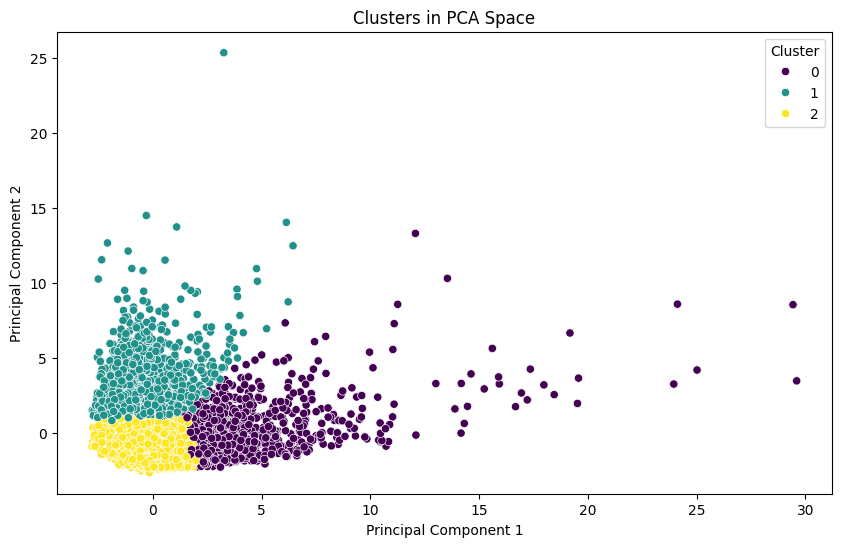

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC2'], hue=principal_df['Cluster'], palette='viridis')
plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

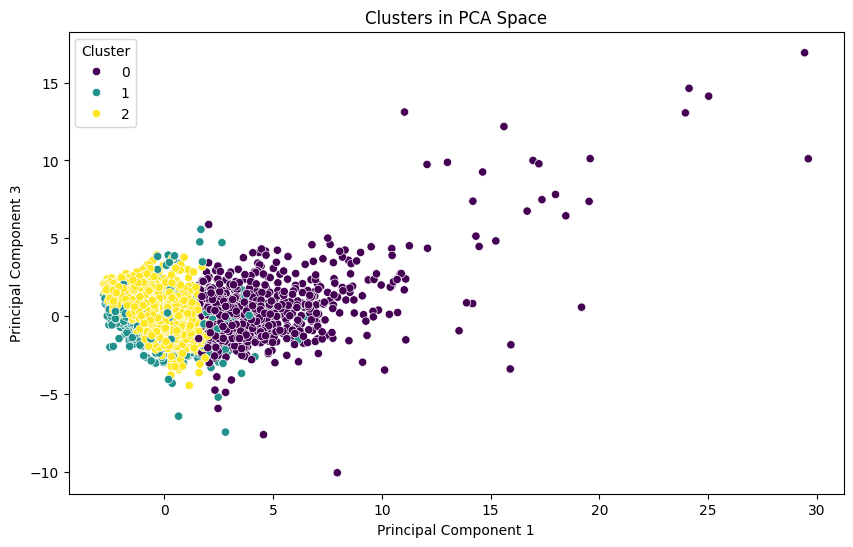

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC3'], hue=principal_df['Cluster'], palette='viridis')
plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.show()

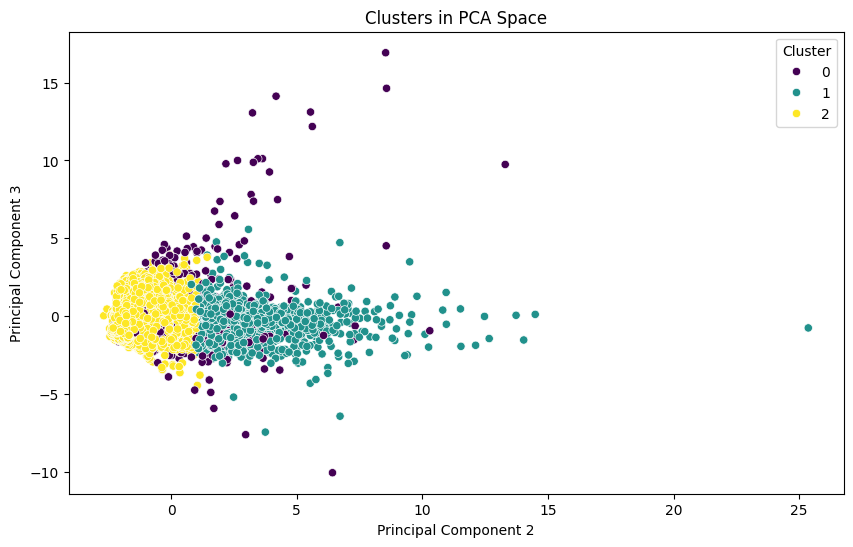

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_df['PC2'], y=principal_df['PC3'], hue=principal_df['Cluster'], palette='viridis')
plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()

**Comparison Between Original and PCA-transformed Data**

- **Cluster Distribution Comparison**

In [76]:
original_clusters = df['Cluster'].value_counts()
pca_clusters = principal_df['Cluster'].value_counts()

comparison_df = pd.DataFrame({
    'Original Data': original_clusters,
    'PCA Data': pca_clusters
})
print(comparison_df)

         Original Data  PCA Data
Cluster                         
2                 6101      6101
1                 1598      1598
0                 1250      1250


- **Correlate PCA with Original Features:**

In [79]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')

In [80]:
pca_corr = pd.DataFrame(pca.components_, columns=df.columns[:-1]).T
pca_corr.columns = [f'PC{i+1}' for i in range(pca.n_components_)]
print(pca_corr)

                                       PC1       PC2       PC3       PC4  \
BALANCE                           0.101916  0.403766 -0.161962  0.277990   
BALANCE_FREQUENCY                 0.120518  0.131671 -0.423569  0.157764   
PURCHASES                         0.411556  0.039702  0.257197  0.042174   
ONEOFF_PURCHASES                  0.346324  0.061614  0.390394  0.086918   
INSTALLMENTS_PURCHASES            0.336761 -0.019380 -0.109000 -0.059986   
CASH_ADVANCE                     -0.022675  0.438954 -0.021717 -0.257098   
PURCHASES_FREQUENCY               0.321138 -0.191269 -0.370315 -0.196199   
ONEOFF_PURCHASES_FREQUENCY        0.294433 -0.018772  0.115884  0.036125   
PURCHASES_INSTALLMENTS_FREQUENCY  0.274419 -0.178945 -0.468394 -0.228177   
CASH_ADVANCE_FREQUENCY           -0.088408  0.434155 -0.103407 -0.264564   
CASH_ADVANCE_TRX                 -0.048004  0.419620 -0.108635 -0.328612   
PURCHASES_TRX                     0.390581 -0.020415 -0.075490 -0.021666   
CREDIT_LIMIT

**Identifying Key Features for Each Principal Component:**

PC1:

High Positive Correlations: PURCHASES (0.412), ONEOFF_PURCHASES (0.346),
INSTALLMENTS_PURCHASES (0.337)

Key Interpretation: PC1 is strongly associated with purchasing behavior, particularly related to both one-off and installment purchases.

PC2:

High Positive Correlations: CASH_ADVANCE (0.439), CASH_ADVANCE_FREQUENCY (0.434), CASH_ADVANCE_TRX (0.420)

Key Interpretation: PC2 is dominated by cash advance behavior, indicating that this component represents customers who frequently take cash advances.

PC3:

High Positive Correlation: ONEOFF_PURCHASES (0.390)

High Negative Correlations: BALANCE_FREQUENCY (-0.424), PURCHASES_INSTALLMENTS_FREQUENCY (-0.468)

Key Interpretation: PC3 differentiates between customers who frequently make one-off purchases versus those who frequently make small installment payments.

PC4:

High Positive Correlation: MINIMUM_PAYMENTS (0.389), TENURE (0.439)

High Negative Correlation: PRC_FULL_PAYMENT (-0.418)

Key Interpretation: PC4 is associated with the repayment behavior, contrasting customers who pay the minimum versus those who pay off the full balance.

PC5 to PC12: These components capture smaller variations, often specific nuances in behavior such as balance frequency, credit limit usage, and detailed payment habits. The key features for these PCs are generally less impactful but could be useful for specific segmentations.

**Interpreting the Results:**

PC1 and PC2: Represent the most significant behaviors, with PC1 focused on purchase behavior and PC2 on cash advances.

Subsequent PCs: Capture more specific behaviors like the method of purchasing (one-off vs. installments), repayment behavior, and frequency of various transactions.

Key Features: The features with high absolute correlations in each PC are the ones that most define the behavior described by that PC.
